# Healthcare Insurance Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_hos=pd.read_csv("Hospitalisation details.csv")
df_hos

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,Age
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,31
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,31
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,30
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,31
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,25
...,...,...,...,...,...,...,...,...,...,...
2338,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,34
2339,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,32
2340,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,53
2341,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,46


In [3]:
df_med= pd.read_csv("Medical Examinations.csv")
df_med

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,Yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes
...,...,...,...,...,...,...,...,...
2330,Id2331,22.340,5.57,No,No,No,1,No
2331,Id2332,17.700,6.28,No,No,No,1,No
2332,Id2333,16.470,6.35,No,No,Yes,1,No
2333,Id2334,17.600,4.39,No,No,No,1,No


In [4]:
df_nam= pd.read_excel("Names.xlsx")
df_nam

,Customer ID,name,Gender
0,Id1,"Hawks, Ms. Kelly",Female
1,Id2,"Lehner, Mr. Matthew D",Male
2,Id3,"Lu, Mr. Phil",Male
3,Id4,"Osborne, Ms. Kelsey",Female
4,Id5,"Kadala, Ms. Kristyn",Female
...,...,...,...
2330,Id2331,"Brietzke, Mr. Jordan",Male
2331,Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",Male
2332,Id2333,"Albano, Ms. Julie",Female
2333,Id2334,"Rosendahl, Mr. Evan P",Male


#### Collate the files so that all the information is in one place

In [5]:
df_nam_med= df_nam.merge(df_med, on="Customer ID")
df_nam_med.head()

,Customer ID,name,Gender,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",Female,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,"Lehner, Mr. Matthew D",Male,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,"Lu, Mr. Phil",Male,34.485,11.87,Yes,No,No,2,yes
3,Id4,"Osborne, Ms. Kelsey",Female,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,"Kadala, Ms. Kristyn",Female,35.530,5.45,No,No,No,No major surgery,yes


In [6]:
df= df_nam_med.merge(df_hos, on="Customer ID")
df.head()

,Customer ID,name,Gender,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID,Age
0,Id1,"Hawks, Ms. Kelly",Female,47.410,7.47,No,No,No,No major surgery,yes,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,55
1,Id2,"Lehner, Mr. Matthew D",Male,30.360,5.77,No,No,No,No major surgery,yes,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,46
2,Id3,"Lu, Mr. Phil",Male,34.485,11.87,Yes,No,No,2,yes,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,53
3,Id4,"Osborne, Ms. Kelsey",Female,38.095,6.05,No,No,No,No major surgery,yes,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,32
4,Id5,"Kadala, Ms. Kristyn",Female,35.530,5.45,No,No,No,No major surgery,yes,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,34


In [7]:
df.shape

(2335, 19)

#### Check for missing values in the dataset

In [8]:
df.isnull().sum()

Customer ID               0
name                      0
Gender                    0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
Age                       0
dtype: int64

#### Find the rows that have trivial value (for example, and delete such rows if they do not contain significant information

In [9]:
print('No. of observations with ? value= ',(df['smoker']=="?").sum())

No. of observations with ? value=  2


In [10]:
print('No. of observations with ? value= ',(df['year']=="?").sum())

No. of observations with ? value=  2


In [11]:
print('No. of observations with ? value= ',(df['month']=="?").sum())

No. of observations with ? value=  3


In [12]:
print('No. of observations with ? value= ',(df['Hospital tier']=="?").sum())

No. of observations with ? value=  1


In [13]:
print('No. of observations with ? value= ',(df['City tier']=="?").sum())

No. of observations with ? value=  1


In [14]:
print('No. of observations with ? value= ',(df['State ID']=="?").sum())

No. of observations with ? value=  2


In [15]:
print('No. of observations with ? value= ',(df['Age']=="?").sum())

No. of observations with ? value=  2


In [16]:
df=df.drop(df[df['smoker']=="?"].index).reset_index(drop=True)

In [17]:
print('No. of observations with ? value= ',(df['smoker']=="?").sum())

No. of observations with ? value=  0


In [18]:
df=df.drop(df[df['year']=="?"].index).reset_index(drop=True)

In [19]:
print('No. of observations with ? value= ',(df['year']=="?").sum())

No. of observations with ? value=  0


In [20]:
df=df.drop(df[df['month']=="?"].index).reset_index(drop=True)

In [21]:
print('No. of observations with ? value= ',(df['month']=="?").sum())

No. of observations with ? value=  0


In [22]:
df=df.drop(df[df['City tier']=="?"].index).reset_index(drop=True)

In [23]:
print('No. of observations with ? value= ',(df['City tier']=="?").sum())

No. of observations with ? value=  0


In [24]:
df=df.drop(df[df['State ID']=="?"].index).reset_index(drop=True)

In [25]:
print('No. of observations with ? value= ',(df['State ID']=="?").sum())

No. of observations with ? value=  0


In [26]:
df=df.drop(df[df['Hospital tier']=="?"].index).reset_index(drop=True)

In [27]:
print('No. of observations with ? value= ',(df['Hospital tier']=="?").sum())

No. of observations with ? value=  0


In [28]:
df=df.drop(df[df['Age']=="?"].index).reset_index(drop=True)

In [29]:
print('No. of observations with ? value= ',(df['Age']=="?").sum())

No. of observations with ? value=  0


In [30]:
df.shape

(2325, 19)

In [31]:
df['Heart Issues'].value_counts()

No     1405
Yes     920
Name: Heart Issues, dtype: int64

<AxesSubplot:xlabel='Heart Issues', ylabel='Count'>

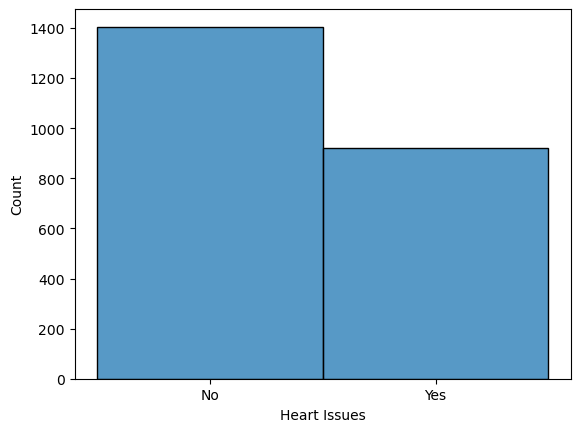

In [32]:
sns.histplot(df['Heart Issues'])

In [33]:
df['smoker'].value_counts()

No     1839
yes     486
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='Count'>

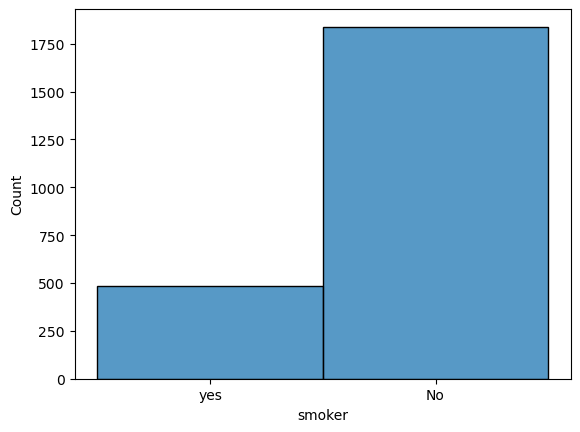

In [34]:
sns.histplot(df['smoker'])

In [35]:
df['Cancer history'].value_counts()

No     1934
Yes     391
Name: Cancer history, dtype: int64

<AxesSubplot:xlabel='Cancer history', ylabel='Count'>

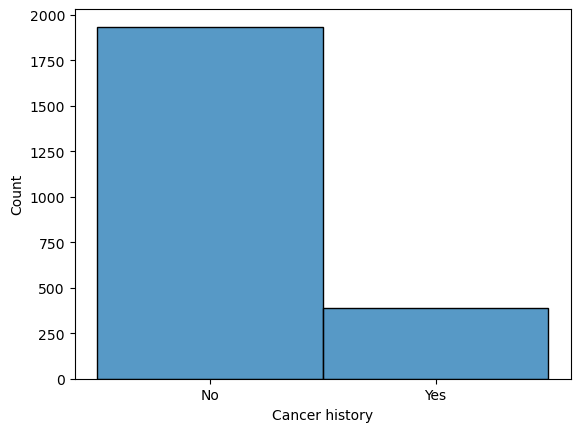

In [36]:
sns.histplot(df['Cancer history'])

In [37]:
df['Any Transplants'].value_counts()

No     2183
yes     142
Name: Any Transplants, dtype: int64

<AxesSubplot:xlabel='Any Transplants', ylabel='Count'>

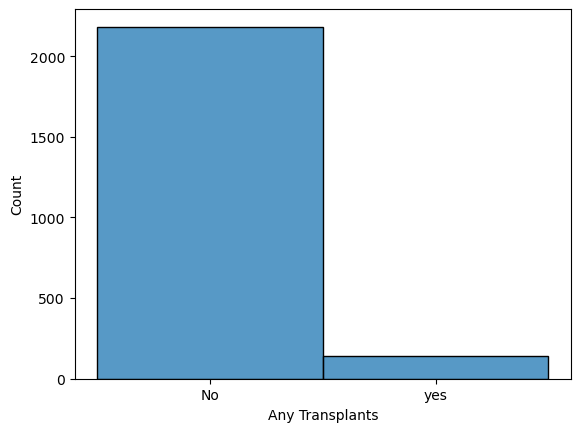

In [38]:
sns.histplot(df['Any Transplants'])

In [39]:
df.dtypes

Customer ID                object
name                       object
Gender                     object
BMI                       float64
HBA1C                     float64
Heart Issues               object
Any Transplants            object
Cancer history             object
NumberOfMajorSurgeries     object
smoker                     object
year                       object
month                      object
date                        int64
children                    int64
charges                   float64
Hospital tier              object
City tier                  object
State ID                   object
Age                        object
dtype: object

#### Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset

In [40]:
df['Gender'] = df['Gender'].apply({'Male':1, 'Female':0}.get)
df['Any Transplants'] = df['Any Transplants'].apply({'yes':1, 'No':0}.get)
df['Cancer history'] = df['Cancer history'].apply({'Yes':1, 'No':0}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'No':0}.get)
df['Hospital tier'] = df['Hospital tier'].apply({'tier - 1':1, 'tier - 2':2, 'tier - 3':3}.get)
df['City tier'] = df['City tier'].apply({'tier - 1':1, 'tier - 2':2, 'tier - 3':3}.get)
df['Heart Issues'] = df['Heart Issues'].apply({'Yes':1, 'No':0}.get)
df['State ID'] = df['State ID'].apply({'R1011':1, 'R1012':2, 'R1013':3, 'R1014':4, 'R1015':5, 'R1016':6, 'R1017':7, 
                                       'R1018':8, 'R1019':9, 'R1020':10, 'R1021':11, 'R1022':12, 'R1023':13,
                                      'R1024':14, 'R1025':15, 'R1026':16}.get)
df['month'] = df['month'].apply({'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}.get)

In [41]:
df['year']=df['year'].astype('int')

In [42]:
df['Age']=df['Age'].astype('int')

In [43]:
df.dtypes

Customer ID                object
name                       object
Gender                      int64
BMI                       float64
HBA1C                     float64
Heart Issues                int64
Any Transplants             int64
Cancer history              int64
NumberOfMajorSurgeries     object
smoker                      int64
year                        int32
month                       int64
date                        int64
children                    int64
charges                   float64
Hospital tier               int64
City tier                   int64
State ID                    int64
Age                         int32
dtype: object

#### The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable.

In [44]:
df['NumberOfMajorSurgeries'].value_counts()

No major surgery    1070
1                    961
2                    272
3                     22
Name: NumberOfMajorSurgeries, dtype: int64

In [45]:
df['NumberOfMajorSurgeries']=df['NumberOfMajorSurgeries'].replace('No major surgery',0)

In [46]:
df['NumberOfMajorSurgeries'].value_counts()

0    1070
1     961
2     272
3      22
Name: NumberOfMajorSurgeries, dtype: int64

In [47]:
df['NumberOfMajorSurgeries']=df['NumberOfMajorSurgeries'].astype('int')

In [48]:
df.dtypes

Customer ID                object
name                       object
Gender                      int64
BMI                       float64
HBA1C                     float64
Heart Issues                int64
Any Transplants             int64
Cancer history              int64
NumberOfMajorSurgeries      int32
smoker                      int64
year                        int32
month                       int64
date                        int64
children                    int64
charges                   float64
Hospital tier               int64
City tier                   int64
State ID                    int64
Age                         int32
dtype: object

#### Age appears to be a significant factor in this analysis

In [49]:
df['Age'].value_counts().head()

19    97
20    85
35    60
51    60
49    57
Name: Age, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Age'>

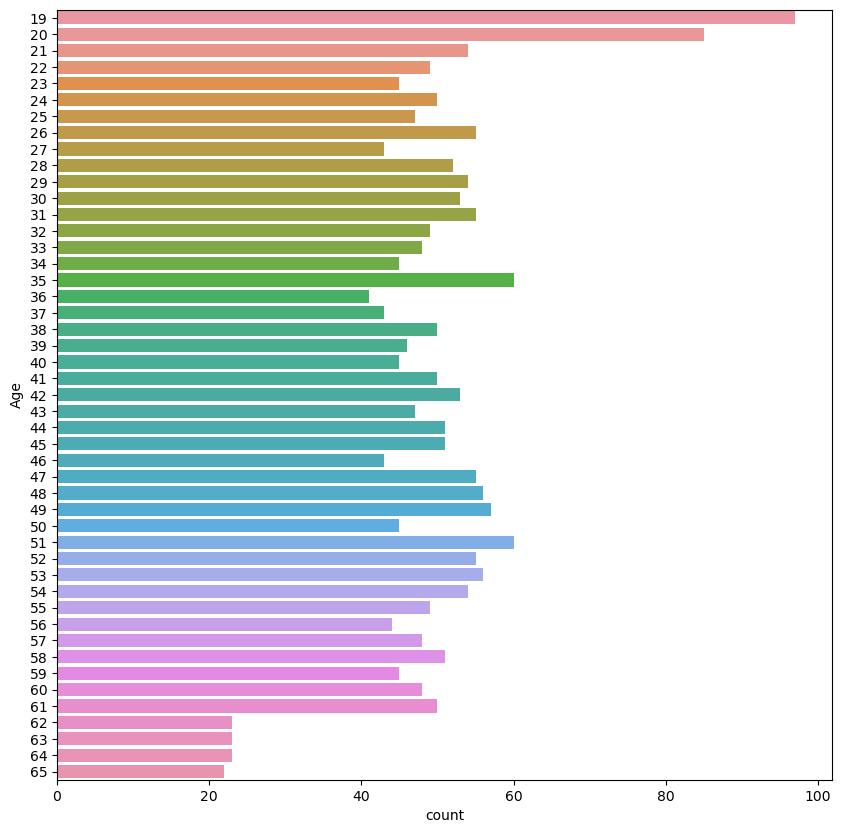

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['Age'],data=df)

#### The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.

In [51]:
df['Gender'].value_counts()

0    1165
1    1160
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

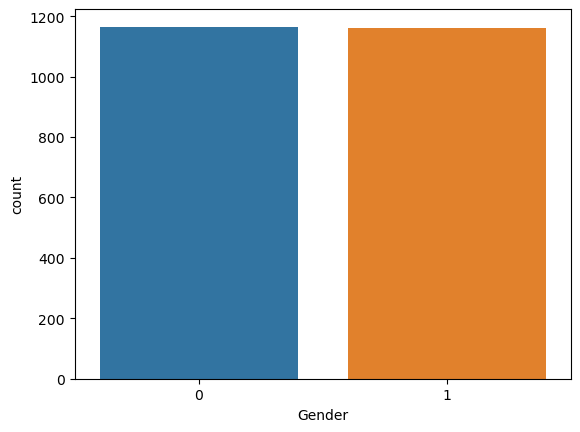

In [52]:
sns.countplot(x=df['Gender'],data=df)

### 0= Female &  1= Male

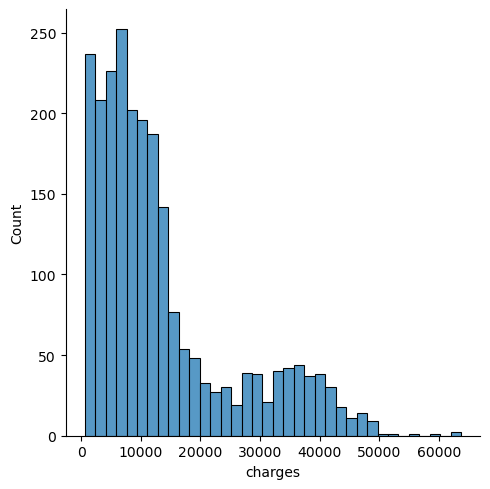

In [53]:
sns.displot(df['charges'])

#### You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.

<AxesSubplot:xlabel='charges'>

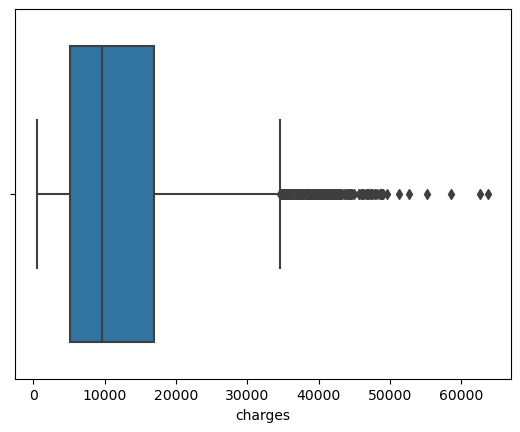

In [54]:
sns.boxplot(x=df['charges'],data=df)

<AxesSubplot:xlabel='charges'>

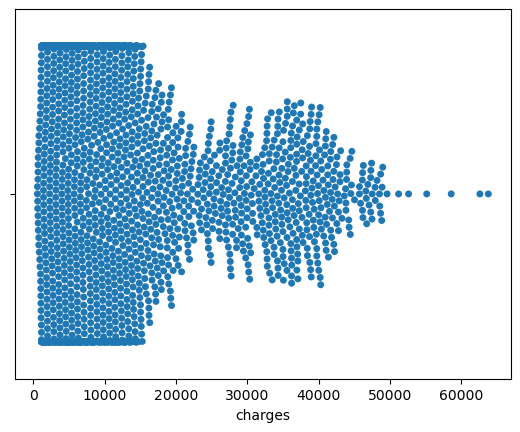

In [55]:
sns.swarmplot(x=df['charges'],data=df)

#### State how the distribution is different across gender and tiers of hospitals

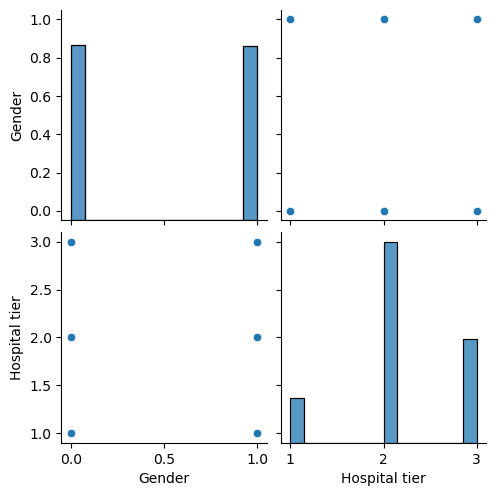

In [56]:
sns.pairplot(df[['Gender','Hospital tier']])

#### Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals

In [57]:
crosstab=pd.crosstab(index=df['Hospital tier'], columns=df['City tier'])

In [58]:
crosstab

City tier,1,2,3
Hospital tier,,,
1,85,106,109
2,403,479,452
3,241,222,228


<AxesSubplot:xlabel='Hospital tier'>

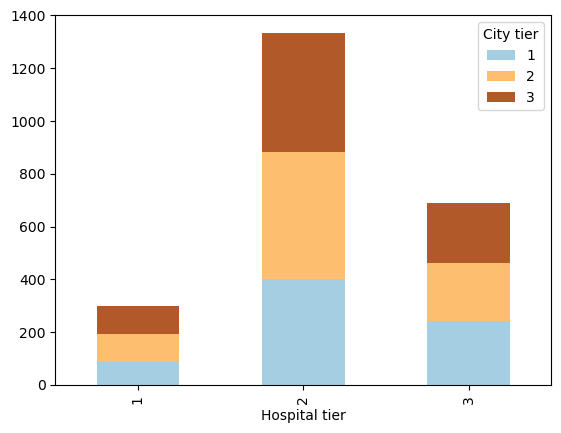

In [59]:
crosstab.plot(kind='bar', stacked=True,colormap='Paired')

In [60]:
df[['charges','Hospital tier']].describe()

,charges,Hospital tier
count,2325.000000,2325.000000
mean,13521.660254,2.168172
std,11863.492697,0.630972
min,563.840000,1.000000
25%,5116.500000,2.000000
50%,9634.540000,2.000000
75%,16903.500000,3.000000
max,63770.430000,3.000000


#### The average hospitalization costs for the three types of hospitals are not significantly different

In [61]:
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [62]:
anova_df=pd.DataFrame()
anova_df['Hospital_tier']=df['Hospital tier']
anova_df['charges']=df['charges']
anova_df.dropna(inplace=True)

In [63]:
anova_df.head()

,Hospital_tier,charges
0,1,63770.43
1,2,62592.87
2,1,58571.07
3,1,55135.40
4,1,52590.83


In [64]:
lm=ols('charges~Hospital_tier',data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Hospital_tier,1.0,6.526309e+10,6.526309e+10,579.042037,2.013400e-114
Residual,2323.0,2.618224e+11,1.127087e+08,NaN,NaN


Since P value is less than 0.05, thus we accept alternate hypothesis

#### The average hospitalization costs for the three types of cities are not significantly different

In [65]:
df[['charges','City tier']].describe()

,charges,City tier
count,2325.000000,2325.000000
mean,13521.660254,2.025806
std,11863.492697,0.807786
min,563.840000,1.000000
25%,5116.500000,1.000000
50%,9634.540000,2.000000
75%,16903.500000,3.000000
max,63770.430000,3.000000


In [66]:
anova_df1=pd.DataFrame()
anova_df1['City_tier']=df['City tier']
anova_df1['charges']=df['charges']
anova_df1.dropna(inplace=True)

In [67]:
anova_df1.head()

,City_tier,charges
0,3,63770.43
1,3,62592.87
2,3,58571.07
3,2,55135.40
4,3,52590.83


In [68]:
lm=ols('charges~City_tier',data=anova_df1).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
City_tier,1.0,4.075841e+08,4.075841e+08,2.898322,0.088806
Residual,2323.0,3.266779e+11,1.406276e+08,NaN,NaN


Since P value is 0.08 which is greater than 0.05, thus it fail to reject H0 i.e, we accept Null Hypothesis

#### Smoking and heart issues are independent

In [69]:
chi_sq=pd.DataFrame()
chi_sq['smoker']=df['smoker']
chi_sq['Heart_Issues']=df['Heart Issues']
chi_sq.dropna(inplace=True)

In [70]:
data_crosstab=pd.crosstab(chi_sq['smoker'],chi_sq['Heart_Issues'])

In [71]:
stat,p,dof,expected=chi2_contingency(data_crosstab)
alpha=0.05
if p<=alpha:
    print('Dependent(reject H0)')
else:
    print('Independent(H0 holds true)')

Independent(H0 holds true)


since p value for the chi square test is greater than 0.05, we can say that heart issue is independent of smoker

### Machine Learning

In [72]:
df1=df.copy()

In [73]:
df1.head()

,Customer ID,name,Gender,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID,Age
0,Id1,"Hawks, Ms. Kelly",0,47.410,7.47,0,0,0,0,1,1968,10,12,0,63770.43,1,3,3,55
1,Id2,"Lehner, Mr. Matthew D",1,30.360,5.77,0,0,0,0,1,1977,6,8,0,62592.87,2,3,3,46
2,Id4,"Osborne, Ms. Kelsey",0,38.095,6.05,0,0,0,0,1,1991,6,6,1,58571.07,1,3,14,32
3,Id5,"Kadala, Ms. Kristyn",0,35.530,5.45,0,0,0,0,1,1989,6,19,0,55135.40,1,2,2,34
4,Id6,"Baker, Mr. Russell B.",1,32.800,6.59,0,0,0,0,1,1962,8,4,0,52590.83,1,3,1,61


In [74]:
df1.drop(columns=['Customer ID', 'name'],axis=1, inplace=True)

In [75]:
df1.head()

,Gender,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID,Age
0,0,47.410,7.47,0,0,0,0,1,1968,10,12,0,63770.43,1,3,3,55
1,1,30.360,5.77,0,0,0,0,1,1977,6,8,0,62592.87,2,3,3,46
2,0,38.095,6.05,0,0,0,0,1,1991,6,6,1,58571.07,1,3,14,32
3,0,35.530,5.45,0,0,0,0,1,1989,6,19,0,55135.40,1,2,2,34
4,1,32.800,6.59,0,0,0,0,1,1962,8,4,0,52590.83,1,3,1,61


#### Examine the correlation between predictors to identify highly correlated predictors. Use a heatmap to visualize this.

In [76]:
df1.corr()

,Gender,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID,Age
Gender,1.000000,0.015239,-0.023890,-0.001778,0.004141,-0.013983,0.003842,0.083612,0.020197,0.026380,0.025301,0.014332,0.060156,-0.006927,0.059716,-0.163290,-0.020197
BMI,0.015239,1.000000,-0.006920,0.017129,0.015893,-0.020235,0.018851,0.107126,-0.049260,-0.029179,0.042765,-0.005339,0.346730,-0.104771,0.038123,0.090484,0.049260
HBA1C,-0.023890,-0.006920,1.000000,0.007699,-0.159855,-0.170921,-0.091594,0.007257,-0.460558,-0.005368,0.059789,-0.101379,0.139697,0.057855,-0.005404,-0.029681,0.460558
Heart Issues,-0.001778,0.017129,0.007699,1.000000,-0.140269,0.111190,0.206147,-0.007159,-0.192273,-0.009940,0.004734,0.023984,0.049299,0.053376,0.023152,0.005282,0.192273
Any Transplants,0.004141,0.015893,-0.159855,-0.140269,1.000000,-0.114677,0.158593,-0.025101,0.381084,0.020752,-0.033858,-0.142040,-0.127028,0.011729,0.002970,0.051225,-0.381084
Cancer history,-0.013983,-0.020235,-0.170921,0.111190,-0.114677,1.000000,0.204208,0.006415,0.101073,-0.000874,-0.018599,-0.027880,-0.022522,-0.021429,-0.018639,0.000306,-0.101073
NumberOfMajorSurgeries,0.003842,0.018851,-0.091594,0.206147,0.158593,0.204208,1.000000,0.017199,-0.151442,-0.002235,-0.022525,-0.113161,0.053308,0.033230,0.027937,-0.003259,0.151442
smoker,0.083612,0.107126,0.007257,-0.007159,-0.025101,0.006415,0.017199,1.000000,-0.011939,0.030360,-0.017523,0.017713,0.838462,-0.474077,0.032034,-0.188839,0.011939
year,0.020197,-0.049260,-0.460558,-0.192273,0.381084,0.101073,-0.151442,-0.011939,1.000000,-0.015719,-0.031032,0.005457,-0.304395,-0.133771,0.008070,-0.011487,-1.000000
month,0.026380,-0.029179,-0.005368,-0.009940,0.020752,-0.000874,-0.002235,0.030360,-0.015719,1.000000,-0.025333,0.018910,0.011776,-0.000866,0.006063,-0.011020,0.015719


<AxesSubplot:>

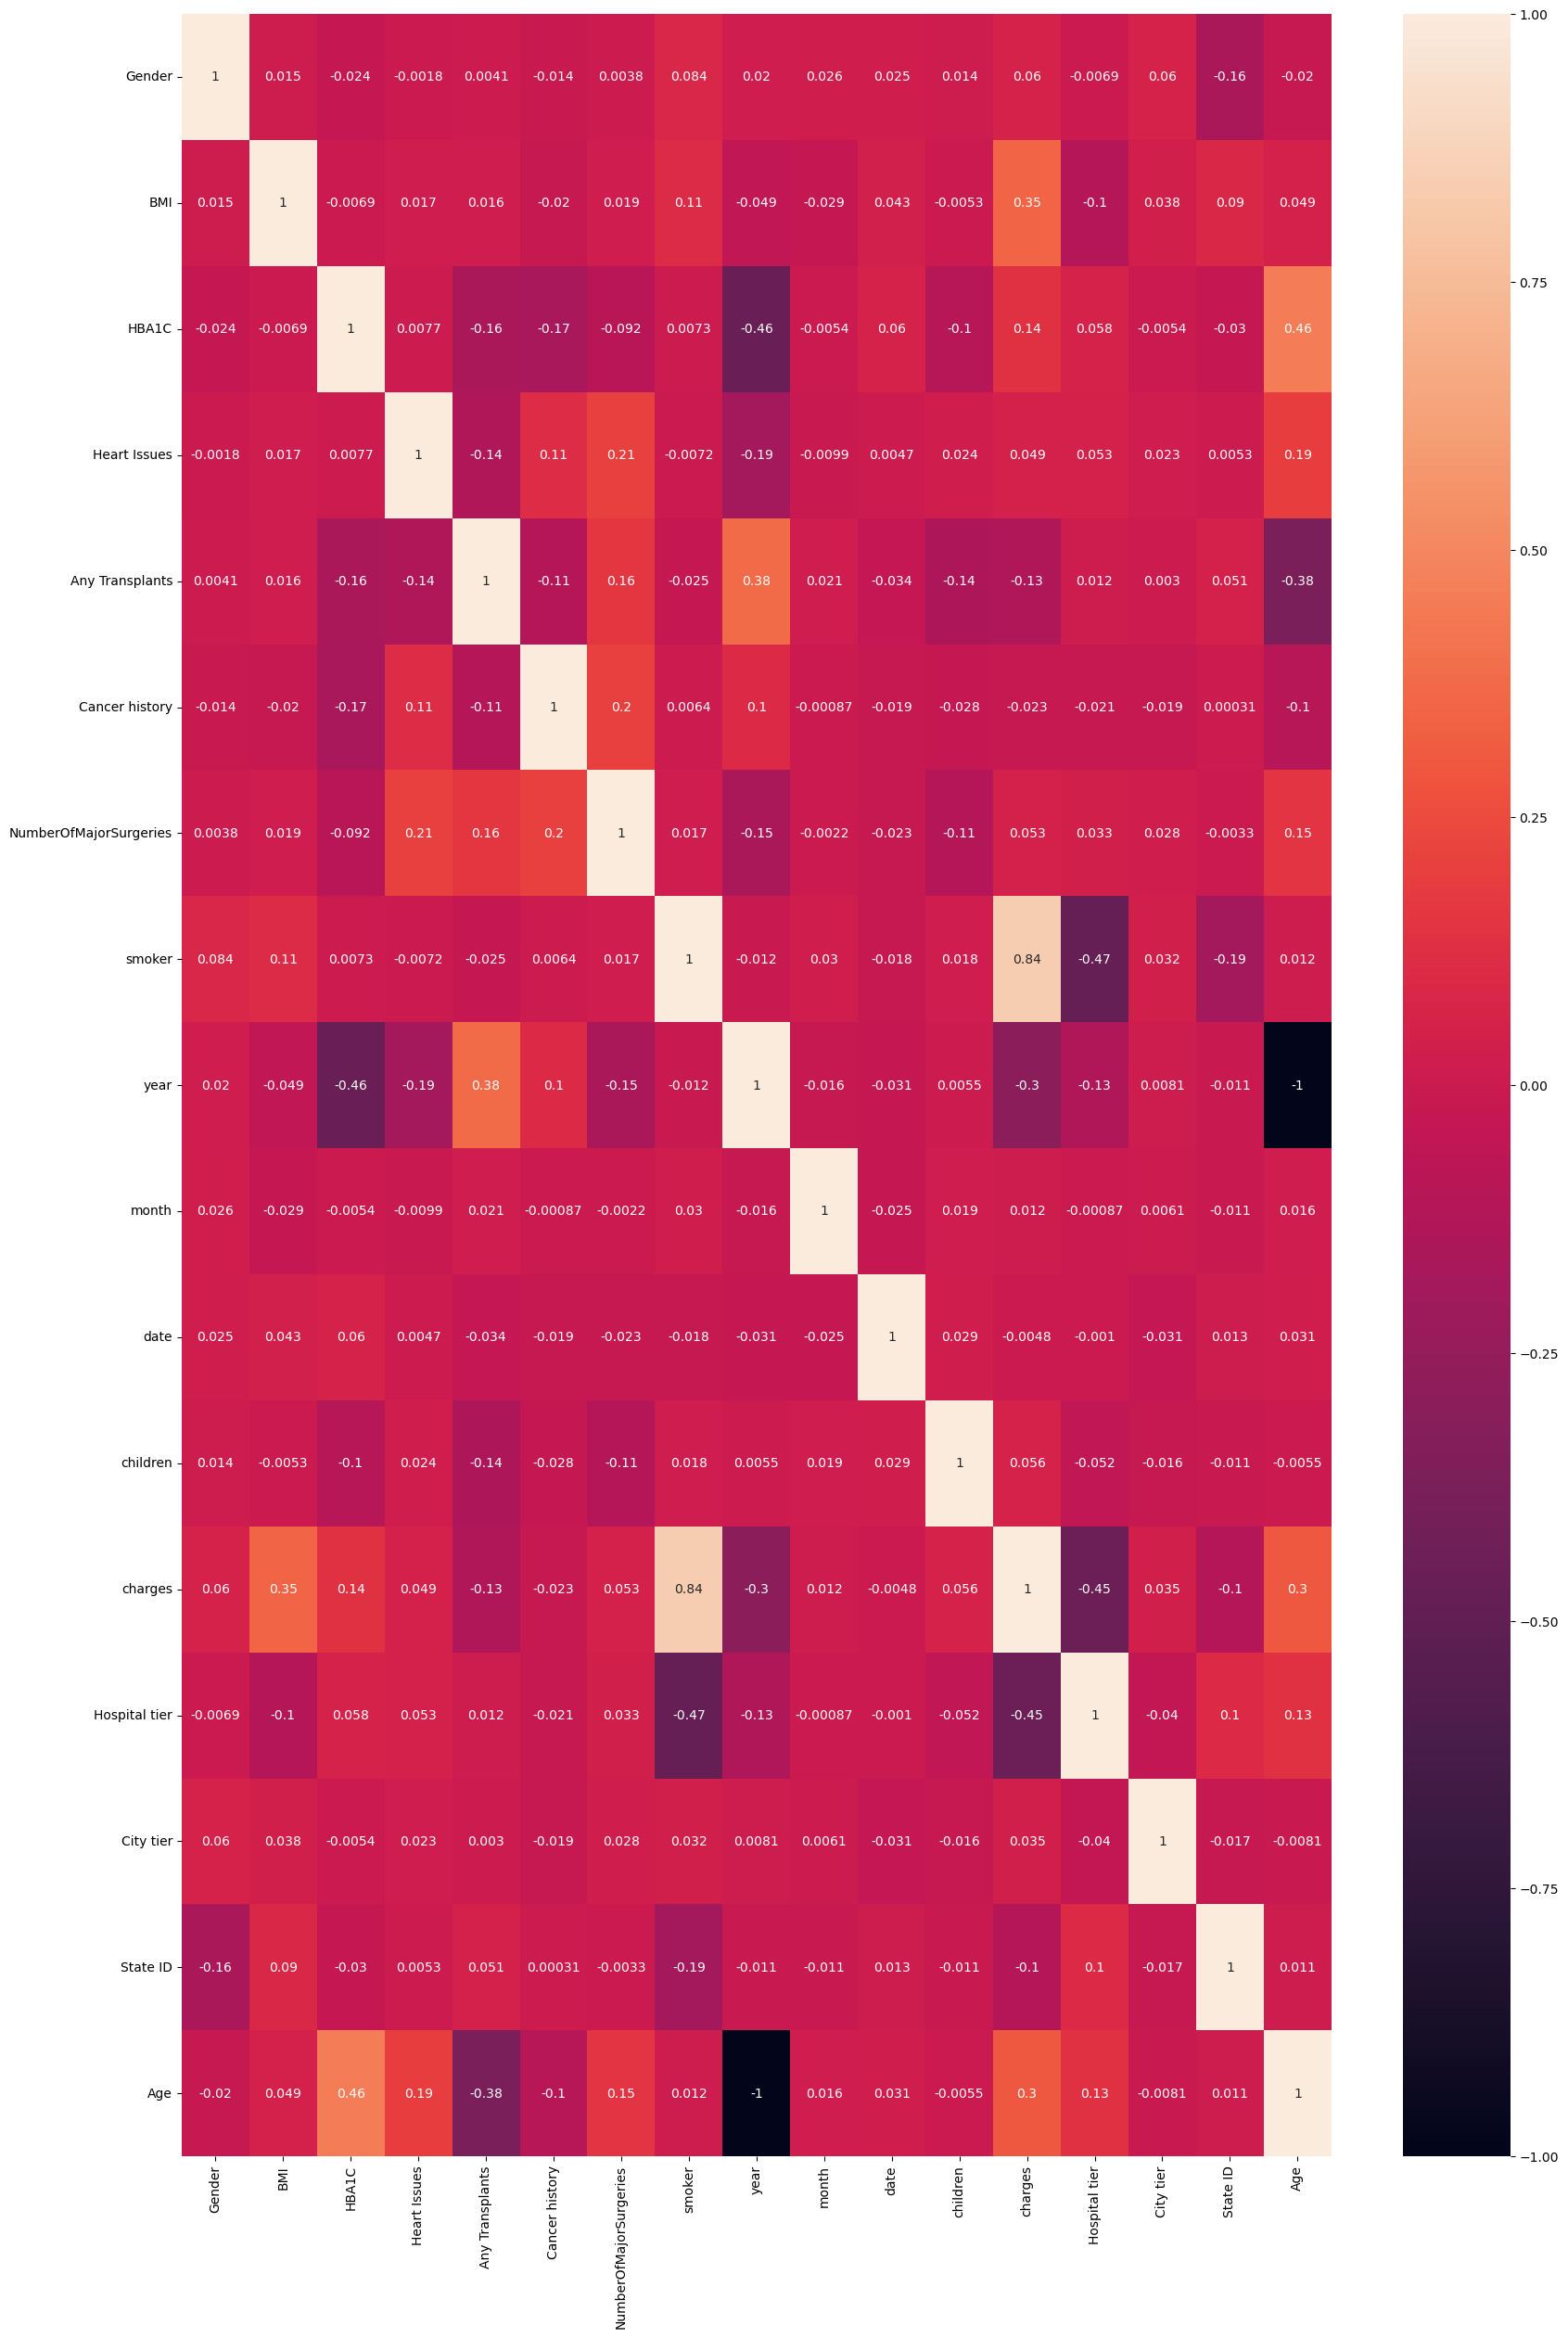

In [77]:
plt.figure(figsize=(20,30))
sns.heatmap(df1.corr(),annot=True)

#### Develop and evaluate the final model using regression with a stochastic gradient descent optimizer.

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from tabulate import tabulate

In [79]:
X = df1.drop(['charges'], axis=1)
Y = df1['charges']

#### Standardizing the features

In [80]:
X=StandardScaler().fit_transform(X)

In [81]:
#Splitting the data to test and train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Let us calculate R-Squared, SGD Regressor Model Accuracy

In [82]:
print("SGD Regression: Health Insurance Analysis ")
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)
sgd_score = sgd_reg.score(x_train, y_train)
print("R-squared:", sgd_score)

sgd_y_pred = sgd_reg.predict(x_test)
sgd_accuracy = explained_variance_score(y_test, sgd_y_pred)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy:", sgd_accuracy, "%")
print()


SGD Regression: Health Insurance Analysis 
R-squared: 0.8533187319127354
SGD Regressor Model Accuracy: 88.428217 %



Graph of the Actual vs. Predicted Target

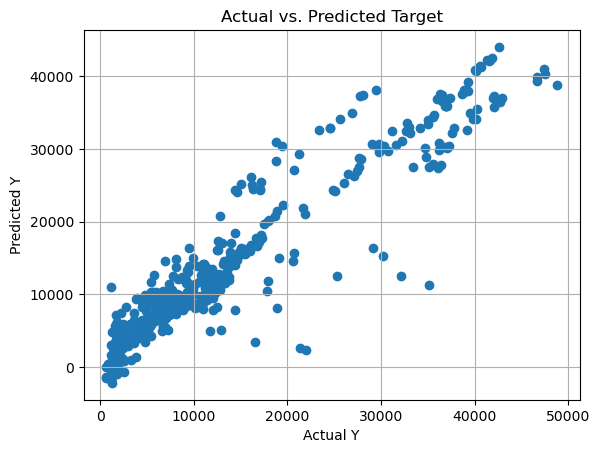

In [83]:
plt.scatter(y_test, sgd_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

Let us calculate R-Squared, Linear Regressor Model Accuracy

In [84]:
print("Linear Regression: Boston Housing Prediction")
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_score = lin_reg.score(x_train, y_train)
print("R-squared:", lin_score)

lin_y_pred = lin_reg.predict(x_test)
lin_accuracy = explained_variance_score(y_test, lin_y_pred)
lin_accuracy = round(lin_accuracy*100, 6)
print("Linear Regressor Model Accuracy:", lin_accuracy, "%")
print()

Linear Regression: Boston Housing Prediction
R-squared: 0.8535499220634002
Linear Regressor Model Accuracy: 88.425559 %



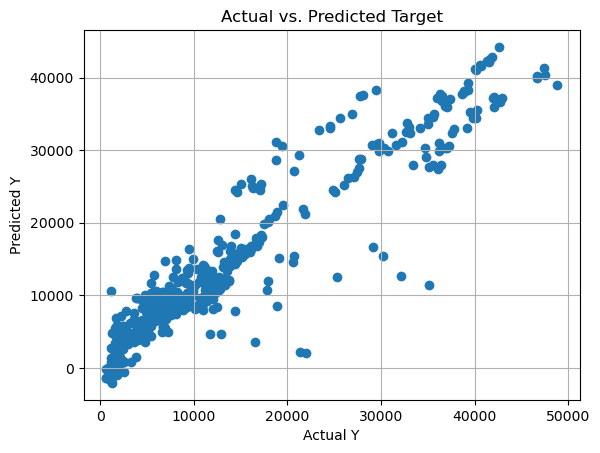

In [85]:
plt.scatter(y_test, lin_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

#### Perform the stratified 5 fold cross validation

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [87]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(sgd_reg, x_train, y_train, scoring='r2', cv=folds)
scores

array([0.81314716, 0.83158359, 0.86930225, 0.87126011, 0.86018169])

#### Use random forest for cost prediction

In [88]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier


In [89]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [90]:
rf_predict = rf_model.predict(x_test)

In [91]:
rf_accuracy = explained_variance_score(y_test, rf_predict)
rf_accuracy = round(rf_accuracy*100, 6)
print("Random Forest Regressor Model Accuracy:", rf_accuracy, "%")
print()

Random Forest Regressor Model Accuracy: 92.232783 %



#### Use Extreme gradient boosting for cost prediction

In [92]:
from xgboost import XGBRegressor

In [93]:
model = XGBRegressor()

In [94]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [95]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=0, max_depth=6, max_leaves=None, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor=None, random_state=0, ...)

In [96]:
train_data_prediction = model.predict(x_train)
print(train_data_prediction)

[ 9211.719   3178.2673   798.486  ... 27897.738  13281.112  33490.72  ]


In [97]:
# Getting R squared value for training dataset
r2_train = metrics.r2_score(y_train, train_data_prediction)
print('R squared value for training dataset : ', r2_train)

<IPython.core.display.Javascript object>

R squared value for training dataset :  0.9979566915082827


In [98]:
test_data_prediction = model.predict(x_test)

In [99]:
r2_train = metrics.r2_score(y_test, test_data_prediction)
print('R squared value for testing dataset : ', r2_train)

<IPython.core.display.Javascript object>

R squared value for testing dataset :  0.9029961439264175


In [100]:
xg_accuracy = explained_variance_score(y_test, test_data_prediction)
xg_accuracy = round(xg_accuracy*100, 6)
print("XGBoost Regressor Model Accuracy:", xg_accuracy, "%")
print()

XGBoost Regressor Model Accuracy: 90.374098 %



#### Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier 1 city and her state’s State ID is R1011. She lives with her partner and two children. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier 1 hospitals.

In [101]:
data = {'Gender':0, 'month':12, 'date':28, 'year':1988, 'City tier':1, 'State ID':1, 'children':2, 'HBA1C':5.8, 'smoker':1, 'Any Transplants':0, 'NumberOfMajorSurgeries':0, 'Cancer history':1, 'Hospital tier':1, 'Age':35, 'Heart Issues':0, 'BMI':35.1}
index = [0]
cost_df = pd.DataFrame(data, index)
cost_df

,Gender,month,date,year,City tier,State ID,children,HBA1C,smoker,Any Transplants,NumberOfMajorSurgeries,Cancer history,Hospital tier,Age,Heart Issues,BMI
0,0,12,28,1988,1,1,2,5.8,1,0,0,1,1,35,0,35.1


In [102]:
cost_pred = sgd_reg.predict(cost_df)
print("Cost of Hospitalization for Christopher, Ms. Jayna, using SGD Regression is: ", cost_pred)

cost_pred1 = lin_reg.predict(cost_df)
print("Cost of Hospitalization for Christopher, Ms. Jayna, using Linear Regression is: ", cost_pred1)

cost_pred2 = rf_model.predict(cost_df)
print("Cost of Hospitalization for Christopher, Ms. Jayna using Random Forest is: ", cost_pred2)

cost_pred3 = model.predict(cost_df)
print("Cost of Hospitalization for Christopher, Ms. Jayna, using XGBoost is: ", cost_pred3)

Cost of Hospitalization for Christopher, Ms. Jayna, using SGD Regression is:  [73358.29893707]
Cost of Hospitalization for Christopher, Ms. Jayna, using Linear Regression is:  [66313.52291818]
Cost of Hospitalization for Christopher, Ms. Jayna using Random Forest is:  [47433.2094]
Cost of Hospitalization for Christopher, Ms. Jayna, using XGBoost is:  [45331.117]
